In [18]:
import matplotlib.pyplot as plt
import pydicom
import os
import cv2
from PIL import Image
import numpy as np

np.set_printoptions(threshold=np.inf)

In [19]:
path = "./XRAY TEST/xray"
files = os.listdir(path)

In [20]:
ds = []
#pixl_array包含了真实数据

for file in files:
    if not os.path.isdir(file):
        f = path+"/"+file
        data = pydicom.read_file(f)
        ds.append(data.pixel_array)

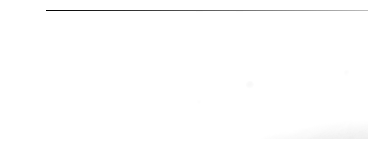

In [21]:
origin = ds[6]

#crop = origin[0:250, 150:800]
#print(crop[100])


crop_1 = np.zeros((250,650), dtype = origin.dtype )
crop_2 = np.zeros((250,650), dtype = origin.dtype )

for i in range(0, 250):
    for j in range(150, 800):
        k = i
        t = j-150
        if origin[i][j] < 700:
            crop_1[k][t] = 4094 #对黑色边角的处理，直接设置最亮
        else:
            crop_1[k][t] = origin[i][j]

crop_2[:, :] = crop_1[:, :]
plt.imshow(crop_1,cmap="gray")
plt.axis("off")
plt.show()
#arr_a = crop_2.flatten()
#n, bins, patches = plt.hist(arr_a, bins=256, normed=1, facecolor='blue', alpha=0.75)  
#plt.show()

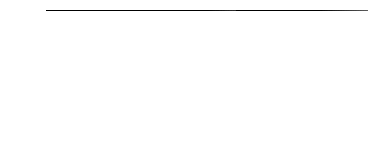

In [22]:
#拉普拉斯算子
#利用图像的二次微分对图像进行锐化
#这么亮的图当然是没什么用啦

cv2.normalize(crop_1,crop_1, 0, 255, cv2.NORM_MINMAX)
img_a= cv2.convertScaleAbs(crop_1)

kernel = np.array([ [0, -1, 0],  
                    [-1,  5.2, -1],  
                    [0, -1, 0] ]) 
img_lap = cv2.filter2D(img_a,cv2.CV_8UC3 , kernel)

plt.imshow(img_lap,cmap="gray")
plt.axis("off")
plt.show()


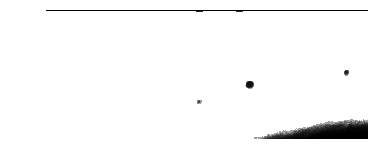

In [23]:
#基于伽马变换
#主要用于图像的校正
#将灰度过高或者灰度过低的图片进行修正，增强对比度

cv2.normalize(crop_1,crop_1, 0, 255, cv2.NORM_MINMAX)
img_d= cv2.convertScaleAbs(crop_1)

fgamma = 120
img_dd = np.power((img_d/255.0),fgamma)*255.0

plt.imshow(img_dd,cmap="gray")
plt.axis("off")
plt.show()

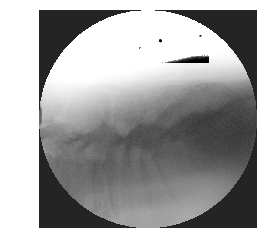

In [24]:
tmp_1 = np.zeros((origin.shape[0], origin.shape[1]),dtype = origin.dtype) 
tmp_1[:, :] = origin[:, :]

cv2.normalize(tmp_1,tmp_1, 0, 255, cv2.NORM_MINMAX)
tmp= cv2.convertScaleAbs(tmp_1)

for i in range(0, 250):
    for j in range(0, 650):
        k = i
        t = 150+j
        if origin[i][t] >= 600:
            tmp[k][t] = img_dd[i][j]

plt.imshow(tmp, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
#拉普拉斯算子
#利用图像的二次微分对图像进行锐化

img = cv2.imread('3.png')
kernel = np.array([ [0, -1, 0],  
                    [-1,  5.2, -1],  
                    [0, -1, 0] ]) 
image_lap = cv2.filter2D(img,cv2.CV_8UC3 , kernel)

      
cv2.imshow('laplace',image_lap)
cv2.imwrite("Laplace.jpg", np.hstack([img,image_lap]))
cv2.waitKey(0)  